<a href="https://colab.research.google.com/github/Levy3006/DataScienceActivities/blob/main/4_HandsOnPrevisaoDespesasMedicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade da Aula de Data Science e Machine Learning promovido pelo Juventude Digital (Outubro de 2023)

# Predição de Despesas Médicas do Seguro de Saúde

Este conjunto de dados *insurance.csv* representa despesas médicas de indivíduos nos EUA.<br/>
Predizer despesas médicas é de fundamental importância para uma empresa de seguros de saúde. É tambem de interesse de cada pessoa.

#### Vamos realizar uma analise exploratória dos dados (EDA) utilizado o Seaborn

- age: idade do beneficiário primário.
- sex: empreiteiro de seguros gênero feminino, masculino.
- bmi: Índice de massa corporal (IMC),  a relação entre altura e peso é dada por (kg / m ^ 2), idealmente o valor deve ficar entre 18,5 a 24,9.
- children: Número de dependentes / Número de crianças cobertas pelo seguro de saúde.
- smoker: A pessoa é fumante ou não.
- region: a área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste e noroeste.
- expenses: custos médicos individuais faturados pelo seguro de saúde.

###Importe as bibliotecas que vamos precisar para gerar nossos gráficos, tabelas e insights

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###Carregue/Leia o DataFrame

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/amandaacacio/Diabetes-Classification/main/insurance.csv')

###Mostre na tela as primeiras cinco linhas do dataframe

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


###Mostre na tela as informações gerais do dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


###Mostre na tela um resumo estatístico dos dados numéricos

In [ ]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


### Qual o número de fumantes e não fumantes? Se preferir, plote esses números num gráfico

In [ ]:
df.groupby(['smoker']).count()

,age,sex,bmi,children,region,expenses
smoker,,,,,,
no,1064,1064,1064,1064,1064,1064
yes,274,274,274,274,274,274


<Axes: xlabel='smoker', ylabel='count'>

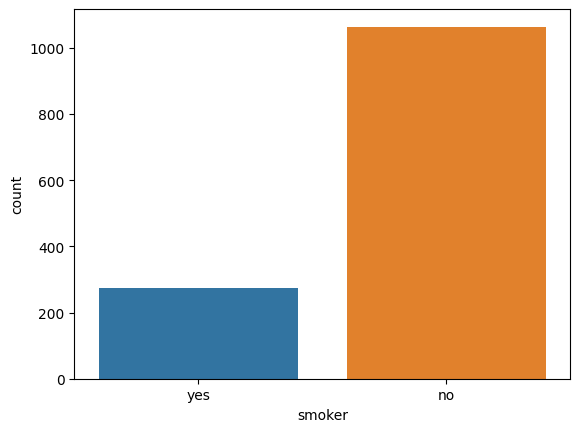

In [ ]:
#Fumantes vs total
sns.countplot(x='smoker', data=df)

### Há mais homens ou mulheres?

<Axes: xlabel='sex', ylabel='count'>

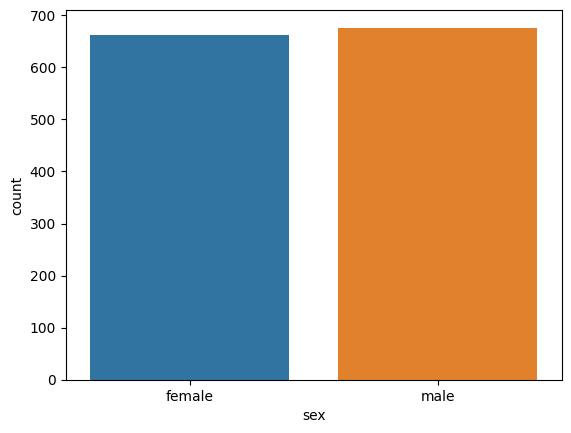

In [ ]:
sns.countplot(x='sex', data=df)

### E se fizermos distinção de gênero considerando os fumantes? Haverá mais homens que fumam ou mulheres fumantes?

In [ ]:
df.groupby(['sex','smoker']).count()

age  bmi  children  region  expenses
sex    smoker                                      
female no      547  547       547     547       547
       yes     115  115       115     115       115
male   no      517  517       517     517       517
       yes     159  159       159     159       159

<Axes: xlabel='sex', ylabel='count'>

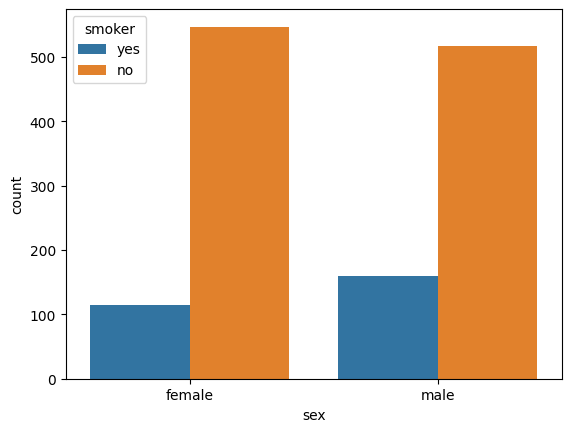

In [ ]:
sns.countplot(x='sex', hue='smoker', data=df)

### Como os dados da idade se distribuem? E os gastos?

In [ ]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

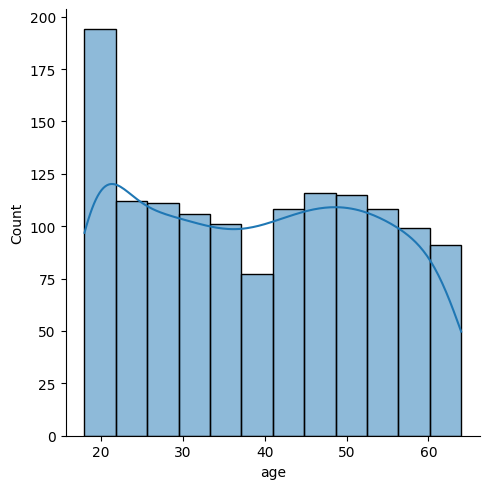

In [ ]:
sns.displot(df['age'], kde = True);

In [ ]:
df['expenses'].describe()

count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: expenses, dtype: float64

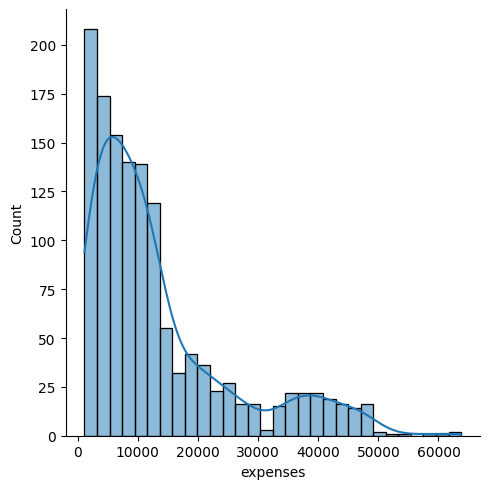

In [ ]:
sns.displot(df['expenses'], kde=True);

### Quem gasta mais com o plano de saúde? Fumantes ou não fumantes?

In [ ]:
df.groupby('smoker')['expenses'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268449,5993.781756,1121.87,3986.4425,7345.405,11362.890,36910.61
yes,274.0,32050.231971,11541.547338,12829.46,20826.2450,34456.350,41019.205,63770.43


- Valor total

<Axes: xlabel='smoker', ylabel='expenses'>

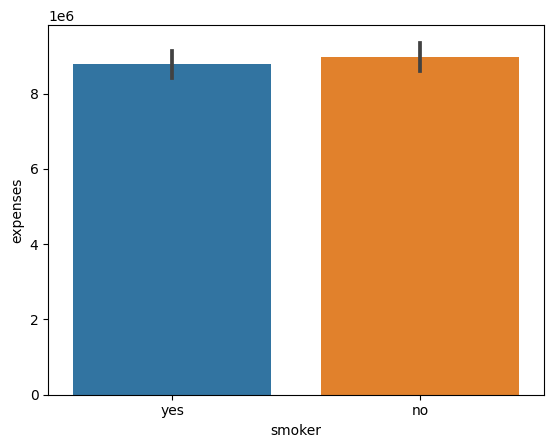

In [ ]:
sns.barplot(x="smoker", y="expenses", data=df, estimator=np.sum)

- Valor médio

<Axes: xlabel='smoker', ylabel='expenses'>

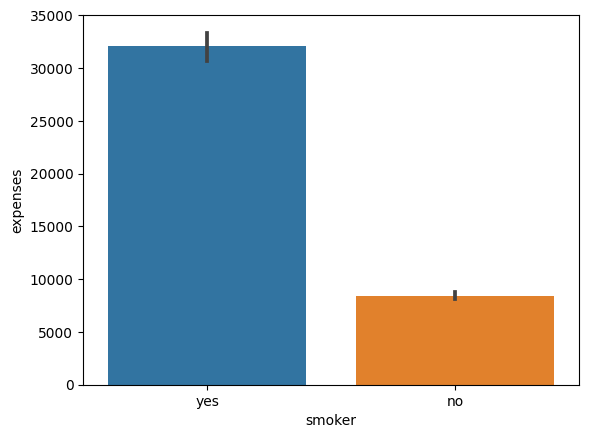

In [ ]:
sns.barplot(x="smoker", y="expenses", data=df, estimator=np.mean)

### Vamos verificar a correlação dos dados

In [ ]:
df.corr()

<ipython-input-26-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<ipython-input-27-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

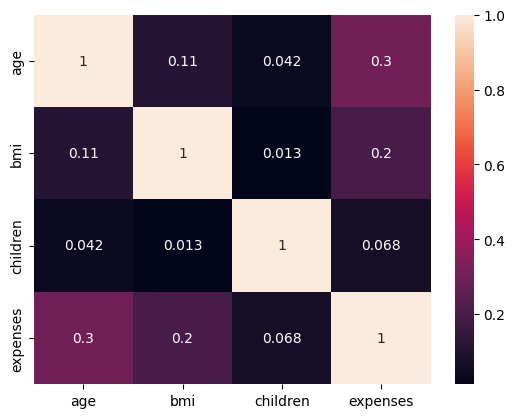

In [ ]:
sns.heatmap(df.corr(), annot = True)

###Utilize o pairplot para uma visualização diferente. Se preferir, filtre as variáveis que prefere ver a correlação, o pairplot pode demorar para rodar com todas as variáveis juntas.

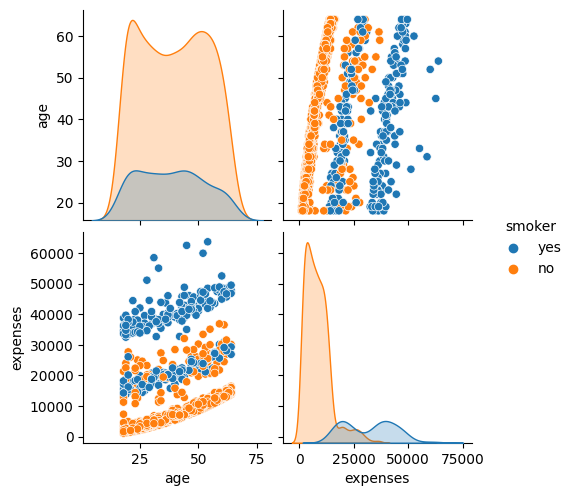

In [ ]:
sns.pairplot(df[['age', 'expenses', 'smoker']], hue='smoker')

### Qual a relação dos gastos com o IMC fazendo distinção dos fumantes?

<Axes: xlabel='bmi', ylabel='expenses'>

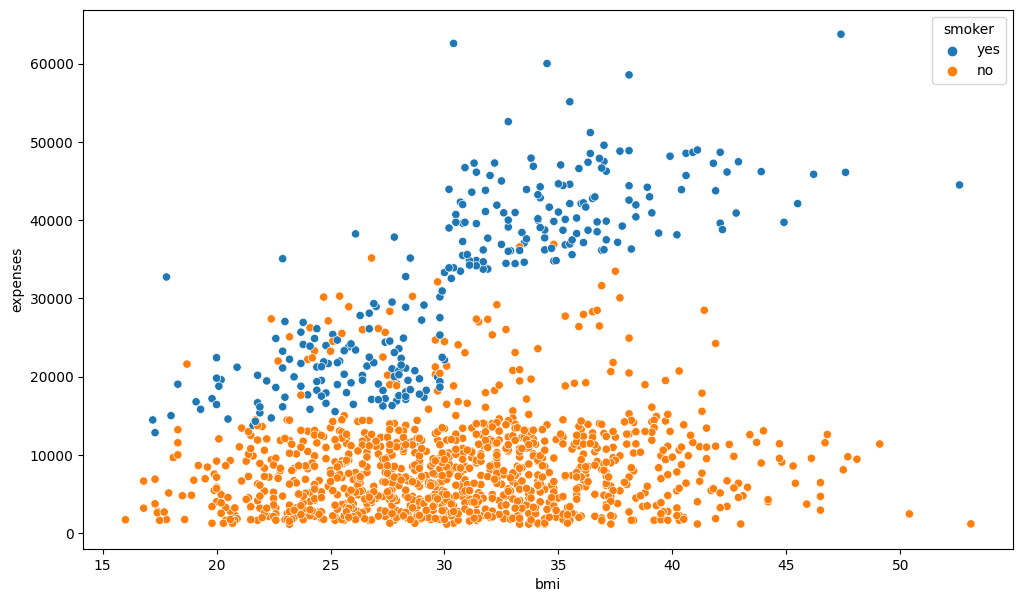

In [ ]:
# relação entre a variável x e y
plt.figure(figsize=(12, 7))
sns.scatterplot(x="bmi", y="expenses", hue="smoker", data=df)

#Feature Engineering

###Transforme/Manipule os Dados Categóricos que queria utilizar no modelo:

In [ ]:
df = pd.get_dummies(df)

###Separe as variáveis Resposta e Preditoras:

In [ ]:
# recupera os valores (X), e as classes (Y)
y = df['expenses']
X = df.drop('expenses', axis=1).values

###Redimensione os Dados:

In [ ]:
# normalizador
from sklearn.preprocessing import StandardScaler

min_max_scaler = StandardScaler()
X = min_max_scaler.fit_transform(X)

#Experimentação

###Dividindo o dataset de treino e teste

In [ ]:
#Biblioteca do sklearn que faz a divisão do dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

###Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(LR.intercept_)

13177.666666666666


###Realize a Avaliação do Modelo

In [ ]:
# métricas
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
y_pred = LR.predict(X_test)

In [ ]:
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred, squared=True)
rmse = mean_squared_error(y_test,y_pred, squared=False)

In [ ]:
print('R2  :',r2)
print('MAE :',mae)
print('MSE :',mse)
print('RMSE:',rmse)

R2  : 0.7908247817158653
MAE : 4003.1412686567164
MSE : 33357060.33904984
RMSE: 5775.557145336702
